In [10]:
import mbcc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
years = [('07', '08'), ('08', '09'), ('09', '10'), ('10', '11'), ('11', '12'), ('12', '13'), ('13', '14'), ('14', '15'), ('15', '16'), ('16', '17'),('17', '18'), ('18', '19'), ('19', '20'), ('20', '21'), ('21', '22'), ('22', '23')]

In [7]:
def run_simulation(game):
    avg_balance = 0
    avg_wins = 0
    avg_losses = 0
    balance = 100
    avg_probs = 0
    winning_seasons = 0
    deets = []

    for y in years:
        fileName = './nba-data-clean/nba' + str(y[0]) + '-' + str(y[1]) + '.csv'
        data = pd.read_csv(fileName)
        data['ML'].replace('NL', np.nan, inplace=True)

        #Drop rows with NaN values
        data.dropna(subset=['ML'], inplace=True)
        data['ML'] = data['ML'].astype(str).astype(float)
        filtered_df = data.groupby('Date').filter(lambda x: len(x) >= 4)
        gs = filtered_df.groupby('Date')
    
        sim = mbcc.mbcc(data, balance, 'ML')
       
        for key, data in gs:
            if game == 1:
                sim = sim.worstFavorite(data)
            if game == 2:
                sim = sim.bestFavorite(data)
            if game == 3:
                sim = sim.worstUnderdog(data)
            if game == 4:
                sim = sim.bestUnderdog(data)
            if game == 5:
                sim = sim.gameB(sim.bestUnderdog, sim.worstUnderdog, data, 3)
            if game == 6:
                sim = sim.parrando(sim.worstFavorite, sim.bestUnderdog, sim.worstUnderdog, data, 3)

        if sim.balance > 100:
            winning_seasons += 1

        deets.append(tuple((str(y[0]) + '-' + str(y[1]), sim.balance_vals)))
        avg_balance += sim.balance
        avg_wins += sim.wins
        avg_losses += sim.losses
        avg_probs += sim.getAvgProb()

    print("Average balance after 16 years:", avg_balance/16)
    print("Average Wins after 16 years:", avg_wins/16)
    print("Average Losses after 16 years:", avg_losses/16)
    print("Win Loss Ratio", (avg_wins)/(avg_wins + avg_losses))
    print('Average Implied Probability prob after 16 years:', avg_probs/16)
    print('Winning Seasons', winning_seasons)
   

    return deets
  

## Worst Favorite

In [9]:
balances = run_simulation(1)

Average balance after 16 years: 93.95898003025978
Average Wins after 16 years: 97.9375
Average Losses after 16 years: 77.1875
Win Loss Ratio 0.559243397573162
Average Implied Probability prob after 16 years: 0.5789701474097637
Winning Seasons 3


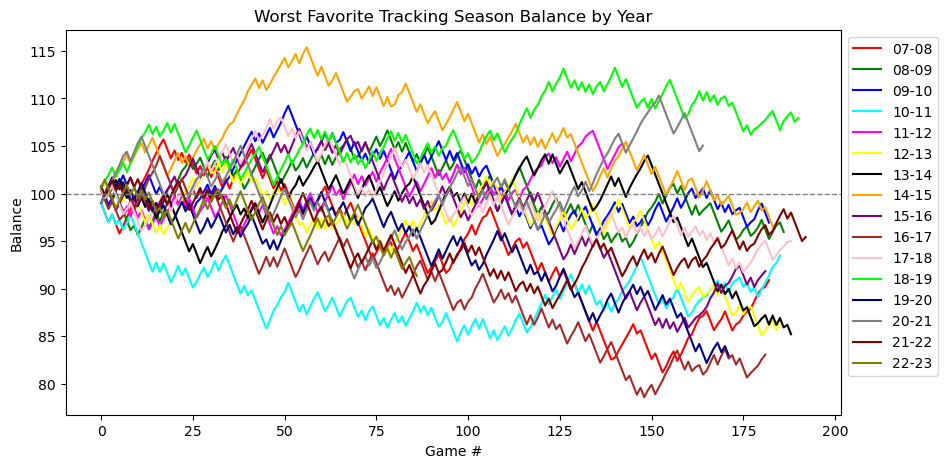

In [11]:
plotInfo = []
for d in balances:
    bals = []
    for b in d[1]:
        bals.append(b[1])

    plotInfo.append(tuple((d[0],bals)))

plt.figure(figsize=(10, 5))

colors = ['red', 'green', 'blue', 'cyan', 'magenta', 'yellow', 'black', 'orange', 
          'purple', 'brown', 'pink', 'lime', 'navy', 'grey', 'maroon', 'olive']

for i, (label, values) in enumerate(plotInfo):
    color = colors[i % len(colors)]
    plt.plot(values, label=label, color=color)

plt.axhline(y=100, color='grey', linestyle='--', linewidth=1)

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.title("Worst Favorite Tracking Season Balance by Year")
plt.xlabel('Game #')
plt.ylabel('Balance')

plt.show()

## Best Favorite 

In [13]:
balances = run_simulation(2)

Average balance after 16 years: 93.09458642790398
Average Wins after 16 years: 145.5
Average Losses after 16 years: 29.625
Win Loss Ratio 0.8308351177730193
Average Implied Probability prob after 16 years: 0.8627796071190649
Winning Seasons 1


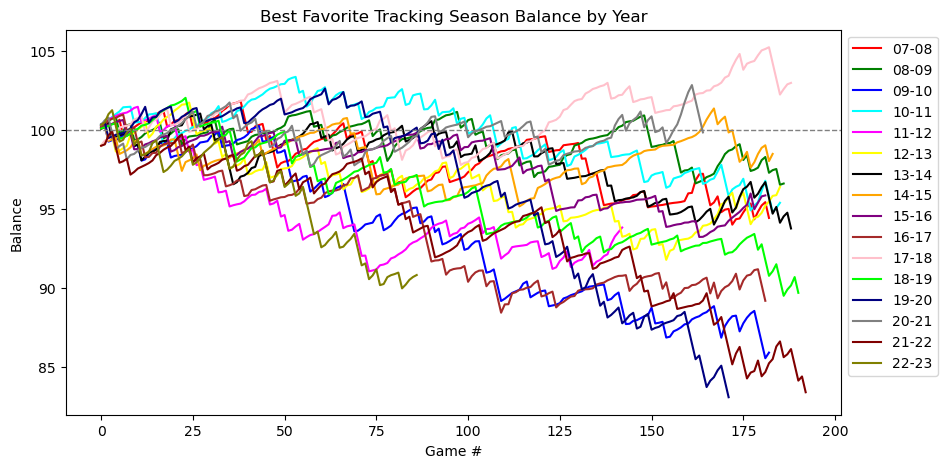

In [14]:
plotInfo = []
for d in balances:
    bals = []
    for b in d[1]:
        bals.append(b[1])

    plotInfo.append(tuple((d[0],bals)))

plt.figure(figsize=(10, 5))

colors = ['red', 'green', 'blue', 'cyan', 'magenta', 'yellow', 'black', 'orange', 
          'purple', 'brown', 'pink', 'lime', 'navy', 'grey', 'maroon', 'olive']

for i, (label, values) in enumerate(plotInfo):
    color = colors[i % len(colors)]
    plt.plot(values, label=label, color=color)

plt.axhline(y=100, color='grey', linestyle='--', linewidth=1)

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.title("Best Favorite Tracking Season Balance by Year")
plt.xlabel('Game #')
plt.ylabel('Balance')

plt.show()

## Worst Underdog

In [15]:
balances = run_simulation(3)

Average balance after 16 years: 93.916875
Average Wins after 16 years: 29.5
Average Losses after 16 years: 145.5
Win Loss Ratio 0.16857142857142857
Average Implied Probability prob after 16 years: 0.17406233514661384
Winning Seasons 7


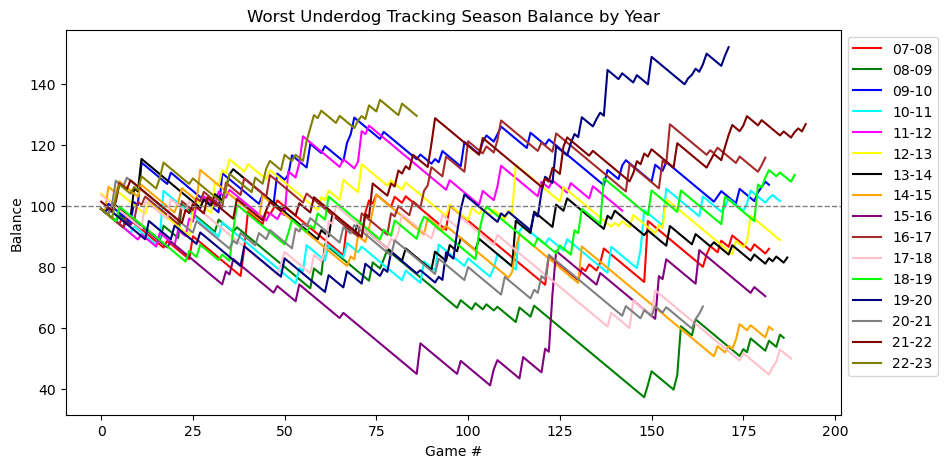

In [16]:
plotInfo = []
for d in balances:
    bals = []
    for b in d[1]:
        bals.append(b[1])

    plotInfo.append(tuple((d[0],bals)))

plt.figure(figsize=(10, 5))

colors = ['red', 'green', 'blue', 'cyan', 'magenta', 'yellow', 'black', 'orange', 
          'purple', 'brown', 'pink', 'lime', 'navy', 'grey', 'maroon', 'olive']

for i, (label, values) in enumerate(plotInfo):
    color = colors[i % len(colors)]
    plt.plot(values, label=label, color=color)

plt.axhline(y=100, color='grey', linestyle='--', linewidth=1)

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.title("Worst Underdog Tracking Season Balance by Year")
plt.xlabel('Game #')
plt.ylabel('Balance')

plt.show()

## Best Underdog

In [17]:
balances = run_simulation(4)

Average balance after 16 years: 95.1043749999999
Average Wins after 16 years: 76.125
Average Losses after 16 years: 98.875
Win Loss Ratio 0.435
Average Implied Probability prob after 16 years: 0.44742867075092885
Winning Seasons 5


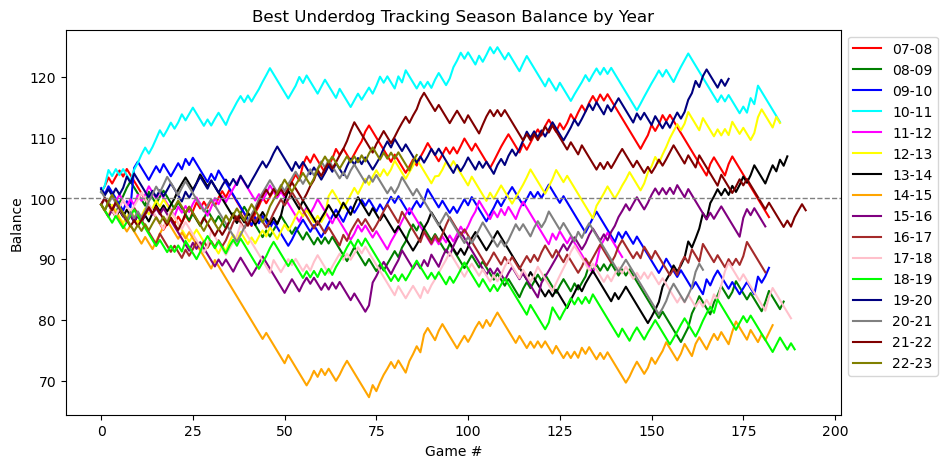

In [18]:
plotInfo = []
for d in balances:
    bals = []
    for b in d[1]:
        bals.append(b[1])

    plotInfo.append(tuple((d[0],bals)))

plt.figure(figsize=(10, 5))

colors = ['red', 'green', 'blue', 'cyan', 'magenta', 'yellow', 'black', 'orange', 
          'purple', 'brown', 'pink', 'lime', 'navy', 'grey', 'maroon', 'olive']

for i, (label, values) in enumerate(plotInfo):
    color = colors[i % len(colors)]
    plt.plot(values, label=label, color=color)

plt.axhline(y=100, color='grey', linestyle='--', linewidth=1)

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.title("Best Underdog Tracking Season Balance by Year")
plt.xlabel('Game #')
plt.ylabel('Balance')

plt.show()

## Game A
Game A is just the Worst Favorite game, these results are previous cells from the above.

In [21]:
balances = run_simulation(1)

Average balance after 16 years: 93.95898003025978
Average Wins after 16 years: 97.9375
Average Losses after 16 years: 77.1875
Win Loss Ratio 0.559243397573162
Average Implied Probability prob after 16 years: 0.5789701474097637
Winning Seasons 3


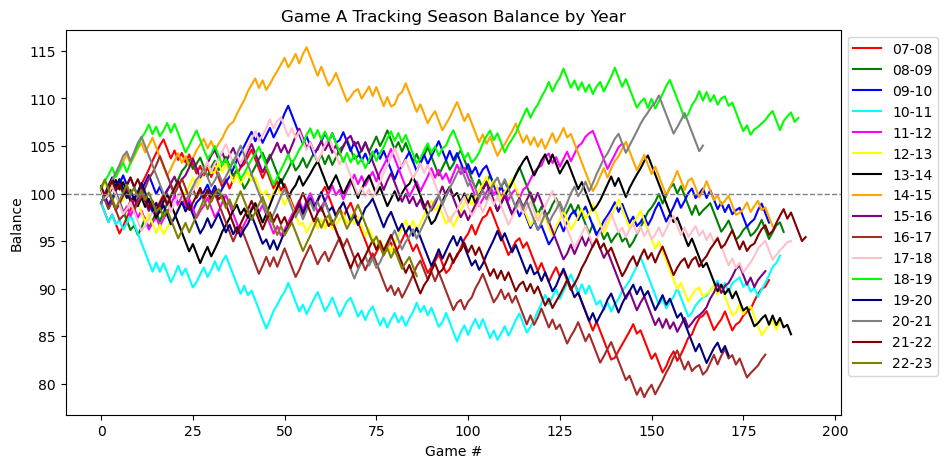

In [22]:
plotInfo = []
for d in balances:
    bals = []
    for b in d[1]:
        bals.append(b[1])

    plotInfo.append(tuple((d[0],bals)))

plt.figure(figsize=(10, 5))

colors = ['red', 'green', 'blue', 'cyan', 'magenta', 'yellow', 'black', 'orange', 
          'purple', 'brown', 'pink', 'lime', 'navy', 'grey', 'maroon', 'olive']

for i, (label, values) in enumerate(plotInfo):
    color = colors[i % len(colors)]
    plt.plot(values, label=label, color=color)

plt.axhline(y=100, color='grey', linestyle='--', linewidth=1)

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.title("Game A Tracking Season Balance by Year")
plt.xlabel('Game #')
plt.ylabel('Balance')

plt.show()

## Game B
Play Worst Underdog if balance divisible by 3, otherwise play Best Underdog

In [19]:
balances = run_simulation(5)

Average balance after 16 years: 92.76374999999996
Average Wins after 16 years: 61.625
Average Losses after 16 years: 113.375
Win Loss Ratio 0.35214285714285715
Average Implied Probability prob after 16 years: 0.35928724514747207
Winning Seasons 8


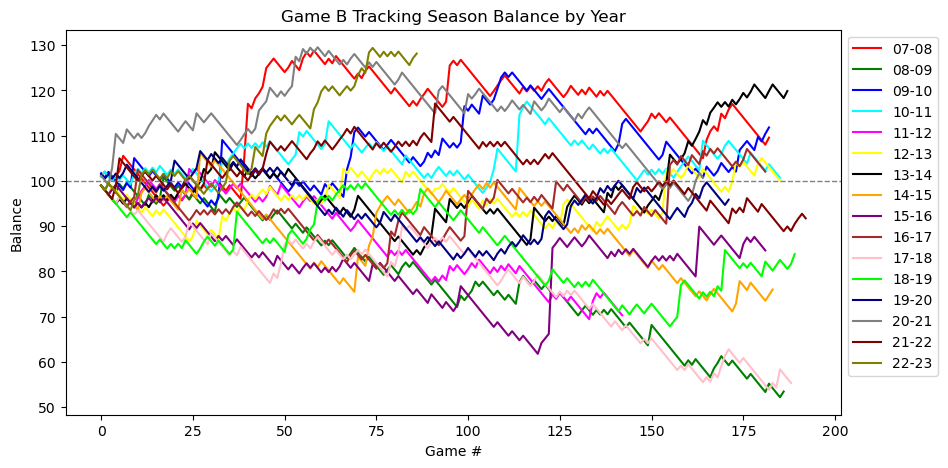

In [20]:
plotInfo = []
for d in balances:
    bals = []
    for b in d[1]:
        bals.append(b[1])

    plotInfo.append(tuple((d[0],bals)))

plt.figure(figsize=(10, 5))

colors = ['red', 'green', 'blue', 'cyan', 'magenta', 'yellow', 'black', 'orange', 
          'purple', 'brown', 'pink', 'lime', 'navy', 'grey', 'maroon', 'olive']

for i, (label, values) in enumerate(plotInfo):
    color = colors[i % len(colors)]
    plt.plot(values, label=label, color=color)

plt.axhline(y=100, color='grey', linestyle='--', linewidth=1)

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.title("Game B Tracking Season Balance by Year")
plt.xlabel('Game #')
plt.ylabel('Balance')

plt.show()

## Parrondo Paradox Winning Game
Game A: Worst Favorite game\
Game B: Play Worst Underdog if balance divisible by 3, otherwise play Best Underdog\
Play in ABBB sequence

In [23]:
balances = run_simulation(6)

Average balance after 16 years: 107.45541053477821
Average Wins after 16 years: 71.5625
Average Losses after 16 years: 103.4375
Win Loss Ratio 0.4089285714285714
Average Implied Probability prob after 16 years: 0.4114409003163521
Winning Seasons 11


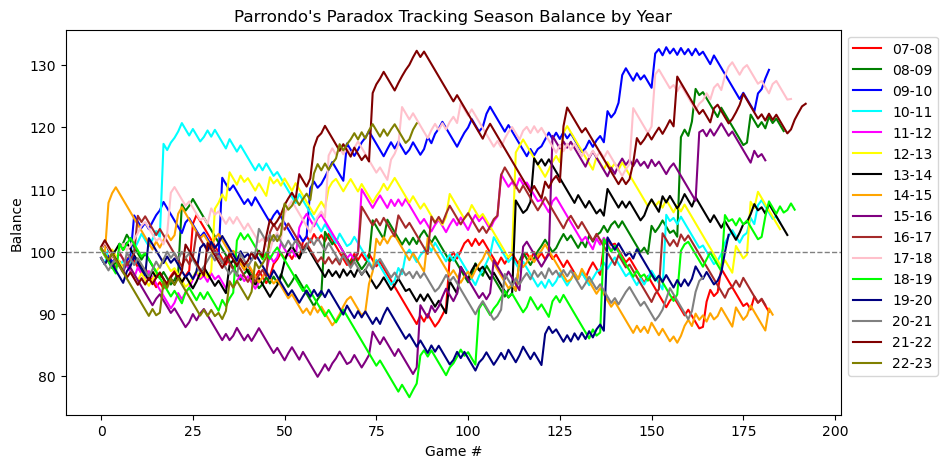

In [24]:
plotInfo = []
for d in balances:
    bals = []
    for b in d[1]:
        bals.append(b[1])

    plotInfo.append(tuple((d[0],bals)))

plt.figure(figsize=(10, 5))

colors = ['red', 'green', 'blue', 'cyan', 'magenta', 'yellow', 'black', 'orange', 
          'purple', 'brown', 'pink', 'lime', 'navy', 'grey', 'maroon', 'olive']

for i, (label, values) in enumerate(plotInfo):
    color = colors[i % len(colors)]
    plt.plot(values, label=label, color=color)

plt.axhline(y=100, color='grey', linestyle='--', linewidth=1)

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.title("Parrondo's Paradox Tracking Season Balance by Year")
plt.xlabel('Game #')
plt.ylabel('Balance')

plt.show()